In [1]:
import pandas as pd
import json
import os
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from collections import Counter

In [5]:
df1 = pd.read_csv("Qualtrics_Annotations_B.csv", sep="\t")
df2 = pd.read_csv("../recherche/readability/data/Qualtrics_Annotations_B_1_1.csv", sep="\t")

# Option 1: Basic check
are_equal = df1.equals(df2)
df1_sorted = df1.sort_index(axis=1).sort_values(by=df1.columns.tolist()).reset_index(drop=True)
df2_sorted = df2.sort_index(axis=1).sort_values(by=df2.columns.tolist()).reset_index(drop=True)

print("DataFrames are equal after sorting:", df1_sorted.equals(df2_sorted))

DataFrames are equal after sorting: True


In [13]:
df1.columns

Index(['text_indice', 'batch', 'text', 'DMesure', 'gold_score_20',
       'gold_score_20_std', 'gold_score_20_label', 'gold_label_trunc',
       'gold_label_maj', 'ANNOT1_LEVEL', 'ANNOT1_SUBLEVEL', 'ANNOT2_LEVEL',
       'ANNOT2_SUBLEVEL', 'ANNOT3_LEVEL', 'ANNOT3_SUBLEVEL',
       'old_gold_score_20_label', 'old_gold_label_trunc', 'old_gold_label_maj',
       'level'],
      dtype='object')

In [9]:
df1.columns

Index(['text_indice', 'batch', 'text', 'DMesure', 'gold_score_20',
       'gold_score_20_std', 'gold_score_20_label', 'gold_label_trunc',
       'gold_label_maj', 'ANNOT1_LEVEL', 'ANNOT1_SUBLEVEL', 'ANNOT2_LEVEL',
       'ANNOT2_SUBLEVEL', 'ANNOT3_LEVEL', 'ANNOT3_SUBLEVEL',
       'old_gold_score_20_label', 'old_gold_label_trunc',
       'old_gold_label_maj'],
      dtype='object')

In [11]:
df1['level'] = df1['gold_score_20_label'].map(classes)

In [14]:
json_dict = {
    row["text_indice"]: {
        "text": row["text"],
        "level": row["level"]
    }
    for _, row in df1.iterrows()
}

# Write to JSON file
with open("texts.json", "w", encoding="utf-8") as f:
    json.dump(json_dict, f, ensure_ascii=False, indent=4)

In [17]:
json_dict

{422: {'text': "« Sortir du syndrome Tarzan »    La brigade anti-négrophobie est un collectif antiraciste. Il existe depuis 2005. Pourquoi ce collectif ? Quelles sont ses actions? Explications avec Franco, le porte-parole du collectif.    Qu'est-ce que la négrophobie?  Tout ce qui est en rapport avec la peur, la haine, le mépris, le rejet des personnes et des cultures noires.    Comment s'est formée la brigade anti-négrophobie?   La brigade est née en 2005. Des incendies ont eu lieu en région parisienne. Ils ont révélé des discriminations raciales. Puis il y a eu la mort de Zyed et Bouna. Cela a posé la question du contrôle au faciès. Pourquoi les Noirs et les Arabes sont plus touchés par le contrôle au faciès ? La France veut combattre le racisme mais elle ne s'en donne pas les moyens.    Quelles ont été vos actions?  En 2005, on a occupé le plateau de Canal+. On a demandé la démission de l'animateur Marc Olivier Fogiel. Il avait été reconnu coupable d'incitation à la haine raciale. O

In [19]:
df1[df1["text_indice"] == 0]

,text_indice,batch,text,DMesure,gold_score_20,gold_score_20_std,gold_score_20_label,gold_label_trunc,gold_label_maj,ANNOT1_LEVEL,ANNOT1_SUBLEVEL,ANNOT2_LEVEL,ANNOT2_SUBLEVEL,ANNOT3_LEVEL,ANNOT3_SUBLEVEL,old_gold_score_20_label,old_gold_label_trunc,old_gold_label_maj,level
268,0,9_1,Questionnaire de Proust « Le principal trai...,Accessible,10.0,4.358899,Facile,Accessible,Accessible,Accessible,3,Accessible,2,Très Facile,5,Facile,Facile,Facile,N2


In [10]:
classes = {'Très Facile':'N1', 'Facile': 'N2', 'Accessible':'N3','+Complexe':'N4'}


In [ ]:
with open('./outputs/thresholds.json') as json_data:
    thresholds = json.load(json_data)
thresholds

In [ ]:
with open('./outputs/distributions.json') as json_data:
    distributions = json.load(json_data)

In [ ]:
def strip_values(d):
    if isinstance(d, dict):
        return {k: strip_values(v) for k, v in d.items()}
    else:
        return None

In [ ]:
sublevels = data_json['N1'].values()
sublevels

In [ ]:
data = {}
for s in sublevels:
    for l in levels:
        data[l] = data_json[l].values()

In [101]:
flattened = {}

for text_id, categories in thresholds.items():
    for category, features in categories.items():
        for feature, value in features.items():
            index = f"{category}/{feature}"
            flattened.setdefault(index, {})[text_id] = value

df = pd.DataFrame.from_dict(flattened, orient='index')
df = df[['N1', 'N2', 'N3', 'N4']]  # ensure column order

df

,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,5.0000,3.5000,2.0000,2.0000
sentence-token-level/max_size_passive,0.0000,5.0000,5.0000,5.0000
sentence-token-level/max_size_named_entities,8.2500,7.0000,9.5000,7.6250
sentence-token-level/max_size_np_pp_modifiers,37.0000,14.0000,17.5000,18.5000
sentence-token-level/max_size_subordination,24.7500,31.5000,46.5000,53.2500
sentence-token-level/max_size_coordination,3.5000,6.0000,6.0000,6.0000
document-token-level/total_token_ratio_aux_verbs,0.1185,0.1134,0.1023,0.0639
document-token-level/total_token_ratio_passive,0.0000,0.0176,0.0173,0.0143
document-token-level/total_token_ratio_named_entities,0.3000,0.2133,0.1937,0.1048
document-token-level/total_token_ratio_subordination,0.6068,0.7033,0.8066,0.8109


In [ ]:
def plot_thresh_tables(thresh_json):
    category_dfs = {}

    # Iterate through each category across all texts
    for text_id, categories in thresh_json.items():
        for category, features in categories.items():
            # Initialize nested dict if not already
            if category not in category_dfs:
                category_dfs[category] = {}
            for feature, value in features.items():
                category_dfs[category].setdefault(feature, {})[text_id] = value

    # Convert each category dict into a DataFrame
    for category in category_dfs:
        category_dfs[category] = pd.DataFrame.from_dict(category_dfs[category], orient='index')
        category_dfs[category] = category_dfs[category][['N1', 'N2', 'N3', 'N4']]  # enforce column order


    for category, df in category_dfs.items():
        display(Markdown(f"### Category: `{category}`"))
        display(df)

In [ ]:
plot_thresh_tables(data_json)

### Binerize the data

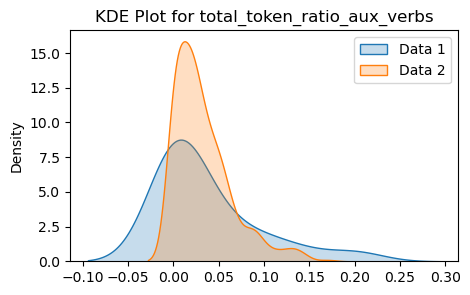

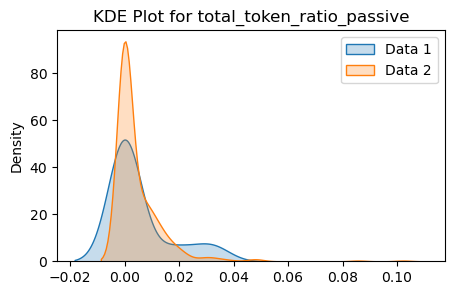

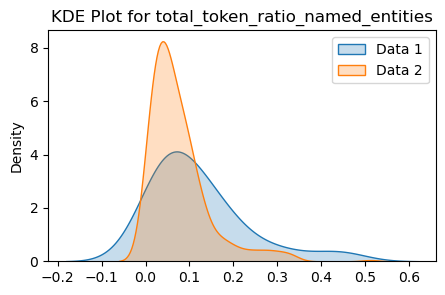

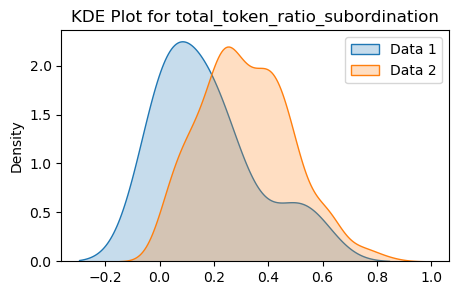

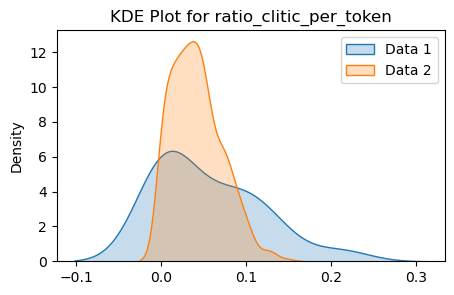

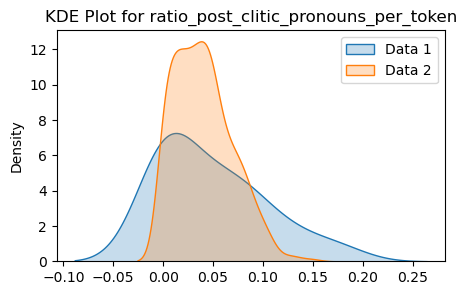

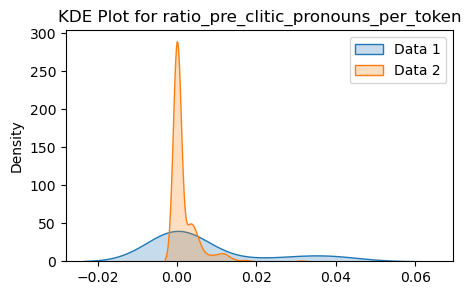

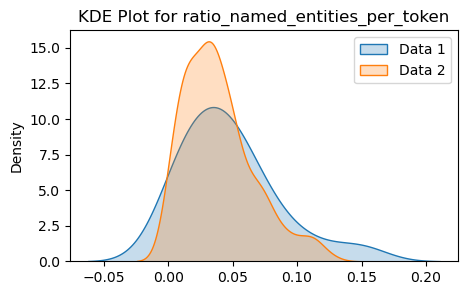

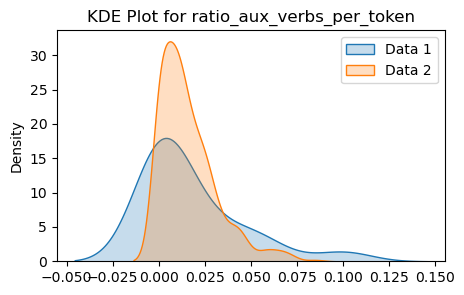

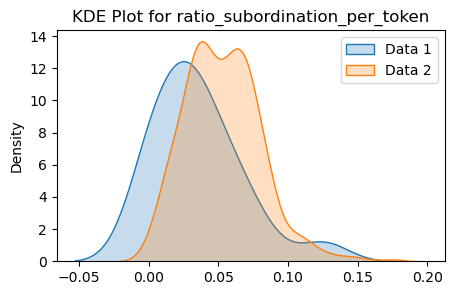

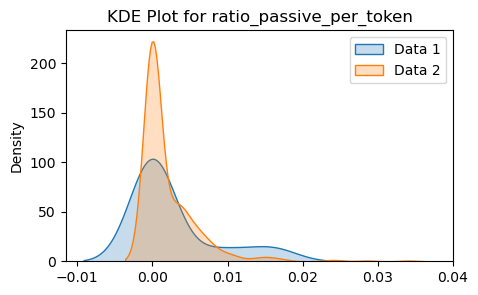

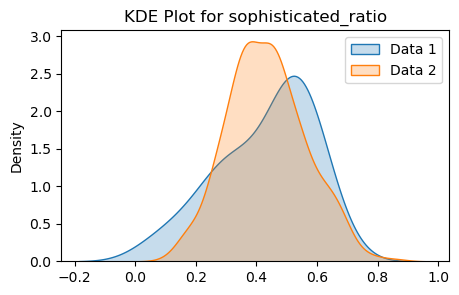

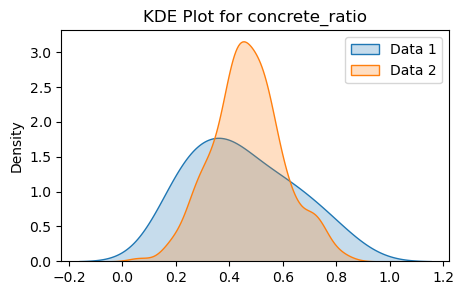

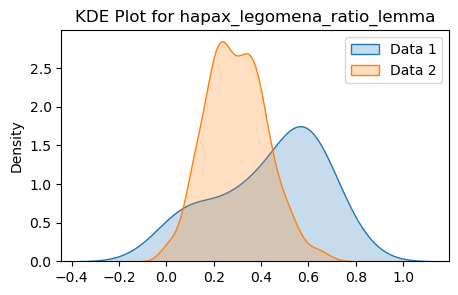

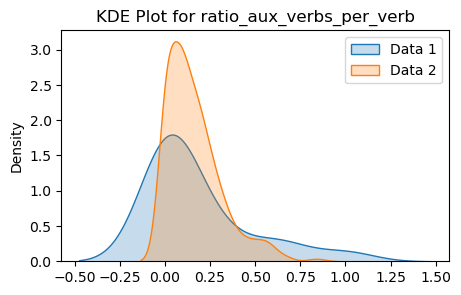

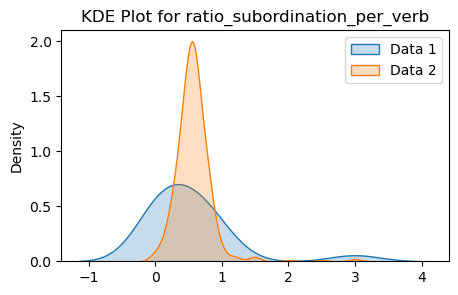

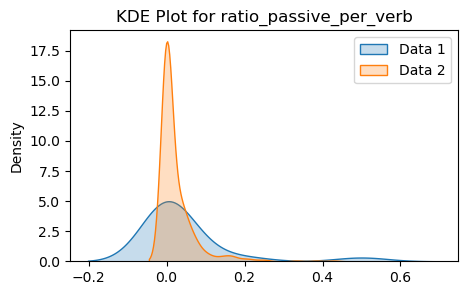

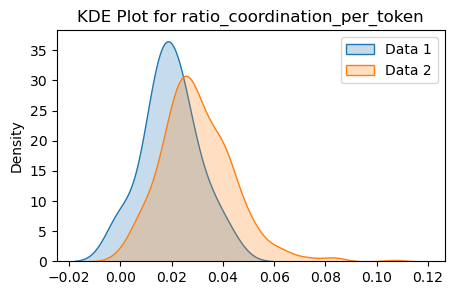

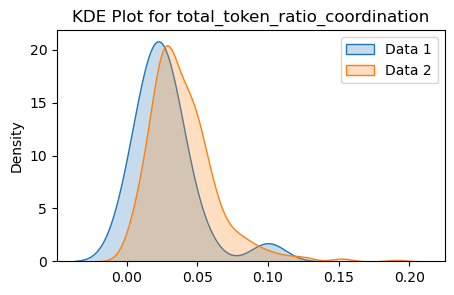

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

level= 'document-token-level'
for heuristic in distributions['N1'][level].keys():

    #heuristic = 'max_size_subordination'
    
    # Example datasets
    data1 = distributions['N1'][level][heuristic]
    data2 = distributions['N2'][level][heuristic]
    data3 = distributions['N3'][level][heuristic]
    data4 = distributions['N4'][level][heuristic]
    data5 = data2 + data3 + data4
    plt.figure(figsize=(5, 3))
    # Create the KDE plot for multiple distributions
    sns.kdeplot(data1, fill=True, label="Data 1")
    sns.kdeplot(data5, fill=True, label="Data 2")
    
    # Display the plot
    plt.legend()
    plt.title("KDE Plot for %s" %heuristic)
    plt.show()


In [ ]:
distributions["N1"]

### binary logistic classifier

In [ ]:
def get_prob_threshold_f1(y_labels, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_labels, y_pred_prob)
    #print(precision, recall)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores[np.isnan(f1_scores)] = 0
    #print(f1_scores[f1_scores<0])
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    return best_threshold

In [ ]:
def get_input_threshold(x_values, y_labels):
    # Example data (inputs and labels)
    x_values = np.array(x_values)  # input values (single feature, reshaped)
    y_labels = np.array(y_labels)  # labels (0 or 1)
    
    # Create a Logistic Regression model
    model = LogisticRegression(class_weight='balanced')
    
    # Train the model on the data
    model.fit(x_values, y_labels)
    
    # Make predictions (probability and class prediction)
    y_pred_prob = model.predict_proba(x_values)[:, 1]  # Probability for class 1
    y_pred_class = model.predict(x_values)  # Predicted class labels
        
    # Decision boundary (where probability is 0.5)
    # plt.axvline(x=model.intercept_ / -model.coef_, color='green', linestyle='--', label='Decision Boundary')
    
    # Desired threshold
    threshold = 0.5
    print(threshold)
    # Get weight and bias from model
    w = model.coef_[0][0]
    b = model.intercept_[0]
    # Compute x for desired threshold
    x_thresh = -(np.log(1 / threshold - 1) + b) / w
    #print(model.intercept_ , -model.coef_)
    #x_thresh = (model.intercept_ / -model.coef_).item()
    return x_thresh

In [ ]:
for k, v in thresh_json['N1'].items():
    print(list(v.keys()))

In [ ]:
classes = ['N1', 'N2', 'N3', 'N4']

values = []
for classe, dico in data_json.items():
    for level, dico2 in dico.items():
        for heuristic, values in dico2.items():
            x_values = []
            y_labels = []
            #if heuristic != 'words_after_verb': continue
            for c in classes:
                values = data_json[c][level][heuristic]
                x_values += [[v] for v in values]
                if classes.index(c) > classes.index(classe):
                    y_labels += [1 for _ in range(len(values))]
                else:
                    y_labels += [0 for _ in range(len(values))]
                    
            print(classe, level, heuristic)          
            thresh = get_input_threshold(x_values, y_labels)
            print(round(thresh,3))
            
            thresh_json[classe][level][heuristic] = round(thresh,3)
    

In [ ]:
thresh_json

In [ ]:
plot_thresh_tables(thresh_json)

### Per-feature univariate likelihood

In [ ]:
classes = ['N1', 'N2', 'N3', 'N4']
mu_sigma = strip_values(distributions)
values = []
for classe, dico in distributions.items():
    for level, dico2 in dico.items():
        for heuristic, values in dico2.items():
            mu = np.mean(values)
            sigma = np.std(values, ddof=1)  # sample std dev
            mu_sigma[classe][level][heuristic] = {"mu": mu, "sigma": sigma}

In [ ]:
# Compute likelihood of a value
v = 3
level = "sentence-token-level"
heuristic = "max_size_aux_verbs"
likelihoods = {}
for classe in classes:
    mu = mu_sigma[classe][level][heuristic]["mu"]
    sigma = mu_sigma[classe][level][heuristic]["sigma"]
    likelihoods[classe] = norm.pdf(v, loc=mu, scale=sigma)
print(likelihoods)
max_key = max(likelihoods, key=likelihoods.get)
print(max_key) 

### Multivariate likelihood

In [5]:
df = pd.read_csv('./Qualtrics_Annotations_B.csv', delimiter="\t", index_col="text_indice")
classes = {'Très Facile':'N1', 'Facile': 'N2', 'Accessible':'N3','+Complexe':'N4'}
df['classe'] = df['gold_score_20_label'].map(classes)

In [6]:
folder_path = "./outputs"

In [7]:
df.loc[0]

batch                                                                    9_1
text                       Questionnaire de Proust    « Le principal trai...
DMesure                                                           Accessible
gold_score_20                                                           10.0
gold_score_20_std                                                   4.358899
gold_score_20_label                                                   Facile
gold_label_trunc                                                  Accessible
gold_label_maj                                                    Accessible
ANNOT1_LEVEL                                                      Accessible
ANNOT1_SUBLEVEL                                                            3
ANNOT2_LEVEL                                                      Accessible
ANNOT2_SUBLEVEL                                                            2
ANNOT3_LEVEL                                                     Très Facile

In [4]:
# get the class of each example and its features
#X: your feature matrix (shape [n_samples, n_features])

#y: your class labels (shape [n_samples])
#features = ["max_size_aux_verbs", "total_token_ratio_aux_verbs", "ratio_aux_verbs_per_token","ratio_aux_verbs_per_verb"]                      
features=["max_size_subordination", "total_token_ratio_subordination", "ratio_subordination_per_token","ratio_subordination_per_verb"]

X_list = []
y_list = []

for index, row in df.iterrows():
    file_path = os.path.join(folder_path, f"{index}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Extract features
    x = [data['features'][f] for f in features]
    X_list.append(x)

    # Extract label
    yi = row['classe']
    y_list.append(yi)

# Convert to NumPy arrays
X = np.array(X_list)
y = np.array(y_list)

In [ ]:
from sklearn.mixture import GaussianMixture

# Suppose you want to compute P(x | y = c) for each class c
classes = np.unique(y)
gmm_models = {}

# Fit n_components multivariate Gaussian per class
for cls in classes:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_cls = X[y == cls]  # subset of data for class cls
    gmm = GaussianMixture(n_components=4, covariance_type='full')
    gmm.fit(X_cls)
    gmm_models[cls] = gmm

# To compute likelihood of a new sample x given a class:
x_new = X[0].reshape(1, -1)  # example input

for cls, gmm in gmm_models.items():
    log_likelihood = gmm.score_samples(x_new)  # log P(x | y=cls)
    print(f"Log-likelihood of class {cls}: {log_likelihood[0]}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[levels.index(i) for i in y], cmap='viridis')
plt.title("PCA projection")
plt.show()

In [ ]:
#selected_features:
textual = ['word_count', 'sentence_count', 'sentence_length', 'word_length', 'word_syllables']



In [8]:
def find_full_key_path(d, target_key, path=None):
    if path is None:
        path = []
    if isinstance(d, dict):
        for k, v in d.items():
            new_path = path + [k]
            if k == target_key:
                return new_path
            result = find_full_key_path(v, target_key, new_path)
            if result is not None:
                return result
    return None

In [6]:
def find_keys_with_substring(d, substring='subordination'):
    matched_keys = []

    def recurse(obj):
        if isinstance(obj, dict):
            for k, v in obj.items():
                if substring in k:
                    matched_keys.append(k)
                recurse(v)
        elif isinstance(obj, list):
            for item in obj:
                recurse(item)

    recurse(d)
    return matched_keys


In [81]:
set(find_keys_with_substring(data,"np_pp_modifiers"))

{'max_size_np_pp_modifiers', 'np_pp_modifiers'}

In [113]:
find_full_key_path(thresholds, 'complexity' )

['N1', 'token-level-high', 'complexity']

In [10]:
#features= ['word_count', 'sentence_count', 'sentence_length', 'word_length', 'word_syllables']
#features = ['complexity', 'lexical_frequency', 'age_of_acquisition', 'lexical_diversity']

'''features = ['parse_depth', 
            'max_size_subordination', 
            'ratio_subordination_per_token',
             'ratio_subordination_per_verb',
             'total_token_ratio_subordination',
            'max_size_np_pp_modifiers', 
            'max_size_passive', 
            'max_size_passive',
             'ratio_passive_per_token',
             'ratio_passive_per_verb',
             'total_token_ratio_passive',
            'max_size_coordination',
             'ratio_coordination_per_token',
             'total_token_ratio_coordination',
            'max_size_aux_verbs',
             'ratio_aux_verbs_per_token',
             'ratio_aux_verbs_per_verb',
             'total_token_ratio_aux_verbs']'''

#features = ['concrete_ratio'] 

features = {'structure': ['word_count', 'sentence_count', 'sentence_length', 'word_length', 'word_syllables'],
           'lexicon': ['complexity', 'lexical_frequency', 'age_of_acquisition', 'lexical_diversity'],
           'syntax': ['parse_depth', 
            'max_size_subordination', 
            'ratio_subordination_per_token',
             'ratio_subordination_per_verb',
             'total_token_ratio_subordination',
            'max_size_np_pp_modifiers', 
            'max_size_passive', 
            'max_size_passive',
             'ratio_passive_per_token',
             'ratio_passive_per_verb',
             'total_token_ratio_passive',
            'max_size_coordination',
             'ratio_coordination_per_token',
             'total_token_ratio_coordination',
            'max_size_aux_verbs',
             'ratio_aux_verbs_per_token',
             'ratio_aux_verbs_per_verb',
             'total_token_ratio_aux_verbs'],
           'semantics': ['concrete_ratio']}



In [23]:
# get the class of each example and its features
#X: your feature matrix (shape [n_samples, n_features])

#y: your class labels (shape [n_samples])
#features = ["max_size_aux_verbs", "total_token_ratio_aux_verbs", "ratio_aux_verbs_per_token","ratio_aux_verbs_per_verb"]                      

X_list = []
y_list = []


yardtick = 'semantics'

keys_paths ={}
with open('./outputs/0.json', 'r') as file:
    dico = json.load(file)
for feat in features[yardtick]:
    keys_paths[feat] = find_full_key_path(dico, feat)


for index, row in df.iterrows():
    file_path = os.path.join(folder_path, f"{index}.json")
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Extract features
    x = []
    for feat in features[yardtick]:
        path_in_dico = keys_paths[feat]
        #print(path_in_dico)
        #print(find_full_key_path(thresholds, feat))
        tmp = data
        if '0' not in path_in_dico:
            for key in path_in_dico:
                tmp = tmp[key]
            x.append(tmp)
        elif path_in_dico.count('0') == 1:
            xi = [tmp['sentences'][str(s)]['features'][feat] for s in range(len(tmp['sentences']))]  
            #print(feat, xi)
            xi = [x for x in xi if x != 'na']
            xi = np.mean(xi)
            x.append(xi)
        elif path_in_dico.count('0') == 2:
            xi = [ tmp['sentences'][str(s)]['words'][str(w)][feat]
                    for s in range(len(tmp['sentences']))
                    for w in range(len(tmp['sentences'][str(s)]['words']))] 
            #print(feat, xi)
            xi = [x for x in xi if x != 'na']
            #if feat in ['lexical_frequency']:
            #    xi = np.percentile(xi, 20)
            #elif featu in ['complexity', 'age_of_acquisition']:
            #    xi = np.percentile(xi, 80)
            #else:
            xi = np.mean(xi)
            x.append(xi)
            
    X_list.append(x)
    yi = row['classe']
    y_list.append(yi)    
        
# Convert to NumPy arrays
X = np.array(X_list)
y = np.array(y_list)

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pickle



best_gmm_models = {}
best_params = {}


classes = np.unique(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dump the fitted scaler
with open('./yardsticks_models/scaler_%s.pkl' %yardtick, 'wb') as f:
    pickle.dump(scaler, f)

# Train GMMs per class with BIC selection
for cls in classes:
    X_cls = X_scaled[y == cls]
    lowest_bic = np.inf
    best_gmm = None
    best_setting = None

    for n in range(1, 6):  # Try 1 to 5 components
        for cov_type in ['full', 'tied', 'diag', 'spherical']:
            gmm = GaussianMixture(n_components=n, covariance_type=cov_type, n_init=10)#, init_params='k-means++')
            gmm.fit(X_cls)
            bic = gmm.bic(X_cls)
            if bic < lowest_bic:
                lowest_bic = bic
                best_gmm = gmm
                best_setting = {'n_components': n, 'covariance_type': cov_type}

    best_gmm_models[cls] = best_gmm
    best_params[cls] = best_setting
    print(f"Best GMM for class {cls}: {best_setting} with BIC={lowest_bic:.2f}")

with open('./yardsticks_models/best_gmm_models_%s.pkl' %yardtick, 'wb') as f:
    pickle.dump(best_gmm_models, f)

with open('./yardsticks_models/best_gmm_models_%s.pkl' %yardtick, 'rb') as f:
    best_gmm_models = pickle.load(f)
    
# Predict class of each sample based on maximum log-likelihood
y_pred = []

# Compute class priors from training labels
class_counts = Counter(y)
total_samples = len(y)
class_priors = {cls: np.log(count / total_samples) for cls, count in class_counts.items()}

for x in X_scaled:
    log_likelihoods = {cls: gmm.score_samples(x.reshape(1, -1))[0] + class_priors[cls] for cls, gmm in best_gmm_models.items()}
    predicted_class = max(log_likelihoods, key=log_likelihoods.get)
    y_pred.append(predicted_class)

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nPrediction accuracy on training set: {accuracy:.3f}")

f1_macro = f1_score(y, y_pred, average='macro')
print(f"\nPrediction f1_macro on training set: {f1_macro:.3f}")

Best GMM for class N1: {'n_components': 5, 'covariance_type': 'spherical'} with BIC=71.57
Best GMM for class N2: {'n_components': 1, 'covariance_type': 'full'} with BIC=630.67
Best GMM for class N3: {'n_components': 1, 'covariance_type': 'full'} with BIC=547.38
Best GMM for class N4: {'n_components': 1, 'covariance_type': 'full'} with BIC=84.42

Prediction accuracy on training set: 0.478

Prediction f1_macro on training set: 0.298


In [17]:
class_priors

{'N3': -0.8472978603872037,
 'N2': -0.7742727253723137,
 'N4': -2.669828988282012,
 'N1': -3.1911259119152984}

In [14]:
class_counts = Counter(y)
total_samples = len(y)
{cls: count / total_samples for cls, count in class_counts.items()}

{'N3': 0.42857142857142855,
 'N2': 0.461038961038961,
 'N4': 0.06926406926406926,
 'N1': 0.04112554112554113}

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pickle


features = {'structure': ['word_count', 'sentence_count', 'sentence_length', 'word_length', 'word_syllables'],
           'lexicon': ['complexity', 'lexical_frequency', 'age_of_acquisition', 'lexical_diversity'],
           'syntax': ['parse_depth', 
            'max_size_subordination', 
            'ratio_subordination_per_token',
             'ratio_subordination_per_verb',
             'total_token_ratio_subordination',
            'max_size_np_pp_modifiers', 
            'max_size_passive', 
            'max_size_passive',
             'ratio_passive_per_token',
             'ratio_passive_per_verb',
             'total_token_ratio_passive',
            'max_size_coordination',
             'ratio_coordination_per_token',
             'total_token_ratio_coordination',
            'max_size_aux_verbs',
             'ratio_aux_verbs_per_token',
             'ratio_aux_verbs_per_verb',
             'total_token_ratio_aux_verbs'],
           'semantics': ['concrete_ratio']}


def find_full_key_path(d, target_key, path=None):
    if path is None:
        path = []
    if isinstance(d, dict):
        for k, v in d.items():
            new_path = path + [k]
            if k == target_key:
                return new_path
            result = find_full_key_path(v, target_key, new_path)
            if result is not None:
                return result
    return None


def load_models(path = './yardsticks_models'):
    best_gmm_models = {}
    scalers = {}
    
    for yardstick in features.keys():
        with open('%s/best_gmm_models_%s.pkl' %(path, yardstick), 'rb') as f:
            best_gmm_models[yardstick] = pickle.load(f)
        with open('%s/scaler_%s.pkl' %(path, yardstick), 'rb') as f:
            scalers[yardstick] = pickle.load(f)
            
    return best_gmm_models, scalers

keys_paths ={}


def get_features(phenomena_output, yardtick = 'lexicon'):
    
    X_list = []
    x = []
    for feat in features[yardtick]:
        path_in_dico = find_full_key_path(phenomena_output, feat)
        tmp = phenomena_output
        if '0' not in path_in_dico:
            for key in path_in_dico:
                tmp = tmp[key]
            x.append(tmp)
        elif path_in_dico.count('0') == 1:
            xi = [tmp['sentences'][str(s)]['features'][feat] for s in range(len(tmp['sentences']))]  
            #print(feat, xi)
            xi = [x for x in xi if x != 'na']
            xi = np.mean(xi)
            x.append(xi)
        elif path_in_dico.count('0') == 2:
            xi = [ tmp['sentences'][str(s)]['words'][str(w)][feat]
                    for s in range(len(tmp['sentences']))
                    for w in range(len(tmp['sentences'][str(s)]['words']))] 
            xi = [x for x in xi if x != 'na']
            xi = np.mean(xi)
            x.append(xi)

    X_list.append(x)  
    X = np.array(X_list)
    return X


#this needs phenomena bio output of the text to predict
def predict(phenomena_output):
    
    output = {}
    
    best_gmm_models, scalers = load_models()
    
    for yardstick in features.keys():
        #print(yardstick)
        
        scaler = scalers[yardstick]
        best_gmm_model = best_gmm_models[yardstick]
        
        X = get_features(phenomena_output, yardstick)
        #print(X)
        
        X_scaled = scaler.fit_transform(X)
    
        for x in X_scaled:
            log_likelihoods = {cls: gmm.score_samples(x.reshape(1, -1))[0] for cls, gmm in best_gmm_model.items()}
            predicted_class = max(log_likelihoods, key=log_likelihoods.get)

        output[yardstick] = predicted_class
    
    return output
    

In [56]:
features.keys()

dict_keys(['structure', 'lexicon', 'syntax', 'semantics'])

In [2]:
with open('./outputs/0.json', 'r') as file:
    dico = json.load(file)

predict(dico)

{'structure': 'N2', 'lexicon': 'N2', 'syntax': 'N3', 'semantics': 'N4'}

In [58]:
dico

{'features': {'word_count': 141,
  'sentence_count': 9,
  'document_length': 162,
  'sophisticated_ratio': 0.345679012345679,
  'concrete_ratio': 0.5308641975308642,
  'lexical_diversity': 0.9824945887445887,
  'hapax_legomena_ratio_lemma': 0.3148148148148148,
  'ratio_passive_per_token': 0.0,
  'ratio_passive_per_verb': 0.0,
  'total_token_ratio_passive': 0.0,
  'max_size_passive': 0,
  'ratio_coordination_per_token': 0.012345679012345678,
  'total_token_ratio_coordination': 0.018518518518518517,
  'max_size_coordination': 2,
  'ratio_clitic_per_token': 0.030864197530864196,
  'ratio_pre_clitic_pronouns_per_token': 0.012345679012345678,
  'ratio_post_clitic_pronouns_per_token': 0.018518518518518517,
  'ratio_aux_verbs_per_token': 0.0,
  'ratio_aux_verbs_per_verb': 0.0,
  'total_token_ratio_aux_verbs': 0.0,
  'max_size_aux_verbs': 0,
  'ratio_named_entities_per_token': 0.030864197530864196,
  'ratio_named_entities_per_verb': 0.35714285714285715,
  'total_token_ratio_named_entities': 0.